# 여행 상품 신청 여부 예측 경진대회
https://dacon.io/competitions/official/235959/data

<br>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


#### 컬럼 확인

**train 데이터**<br>

id : 샘플 아이디<br>
Age : 나이<br>
TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)<br>
CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) <br>
DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간<br>
Occupation : 직업<br>
Gender : 성별<br>
NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원<br>
NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수<br>
ProductPitched : 영업 사원이 제시한 상품<br>
PreferredPropertyStar : 선호 호텔 숙박업소 등급<br>
MaritalStatus : 결혼여부<br>
NumberOfTrips : 평균 연간 여행 횟수<br>
Passport : 여권 보유 여부 (0: 없음, 1: 있음)<br>
PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도<br>
OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)<br>
NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수<br>
Designation : (직업의) 직급<br>
MonthlyIncome : 월 급여<br>
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함) → test데이터에는 없음




**sample_submission.csv : 제출 양식**<br>
id : 샘플 아이디<br>
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

#### 결측치 확인

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [5]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

#### 이상치 확인

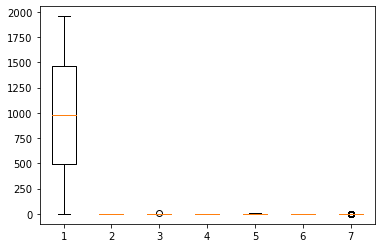

In [16]:
# int형
fig, ax = plt.subplots()
ax.boxplot([train.id, train.CityTier, train.NumberOfPersonVisiting, train.Passport,
           train.PitchSatisfactionScore, train.OwnCar, train.ProdTaken])
plt.show()

NumberOfPersonVisiting, PitchSatisfactionScore, ProdTaken

<AxesSubplot:>

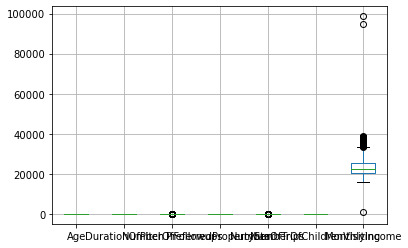

In [32]:
#float형
train[['Age','DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar','NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']].boxplot()

NumberOfFollowups, NumberOfTrips, MonthlyIncome